In [10]:
from google.colab import files

uploaded = files.upload()

Saving graph_edges.csv to graph_edges.csv
Saving graph_nodes.csv to graph_nodes.csv


In [16]:
import pandas as pd

# Load the datasets
edges_df = pd.read_csv('graph_edges.csv')
nodes_df = pd.read_csv('graph_nodes.csv')

# Show the first few rows of the datasets
edges_head = edges_df.head()
nodes_head = nodes_df.head()

edges_head, nodes_head


(     Source              Target    Type
 0   cairdin  570306133677760513  posted
 1  jnardino  570301130888122368  posted
 2  jnardino  570301031407624196  posted
 3  jnardino  570300817074462722  posted
 4  jnardino  570300767074181121  posted,
          Node  Type
 0     cairdin  user
 1    jnardino  user
 2  yvonnalynn  user
 3  cjmcginnis  user
 4       pilot  user)

In [17]:
# Importing necessary libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visualisation settings
sns.set(style="whitegrid")

# 1. Summary Statistics
edges_summary = edges_df.describe(include='all')
nodes_summary = nodes_df.describe(include='all')

# 2. Check for Missing Values
missing_values_edges = edges_df.isnull().sum()
missing_values_nodes = nodes_df.isnull().sum()

# 3. Data Types and Unique Values
data_types_edges = edges_df.dtypes
unique_values_edges = edges_df.nunique()

data_types_nodes = nodes_df.dtypes
unique_values_nodes = nodes_df.nunique()

edges_summary, nodes_summary, missing_values_edges, missing_values_nodes, data_types_edges, unique_values_edges, data_types_nodes, unique_values_nodes


(             Source  Target    Type
 count         28970   28970   28970
 unique        22186   14491       2
 top     JetBlueNews  United  posted
 freq             63    3822   14485,
            Node   Type
 count     22192  22192
 unique    22192      3
 top     cairdin  tweet
 freq          1  14485,
 Source    0
 Target    0
 Type      0
 dtype: int64,
 Node    0
 Type    0
 dtype: int64,
 Source    object
 Target    object
 Type      object
 dtype: object,
 Source    22186
 Target    14491
 Type          2
 dtype: int64,
 Node    object
 Type    object
 dtype: object,
 Node    22192
 Type        3
 dtype: int64)

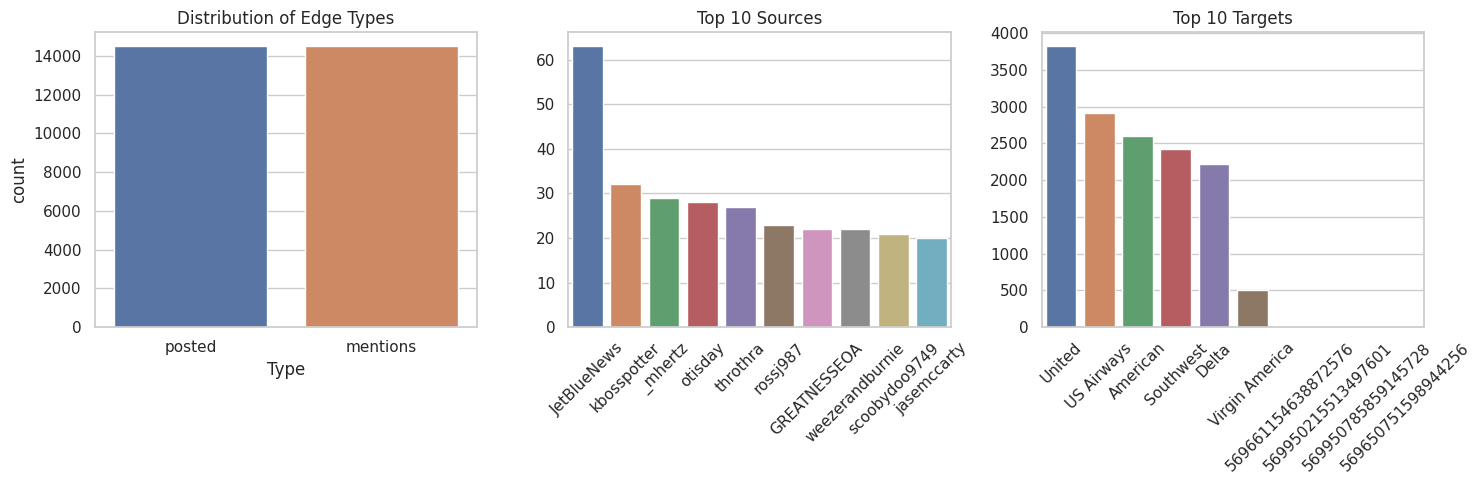

In [18]:
# Setting up the figure size for plots
plt.figure(figsize=(15, 5))

# 1. Type Distribution in Edges Dataset
plt.subplot(1, 3, 1)
edges_type_plot = sns.countplot(x='Type', data=edges_df)
edges_type_plot.set_title('Distribution of Edge Types')

# 2. Top 10 Sources
plt.subplot(1, 3, 2)
top_sources = edges_df['Source'].value_counts().head(10)
top_sources_plot = sns.barplot(x=top_sources.index, y=top_sources.values)
top_sources_plot.set_title('Top 10 Sources')
top_sources_plot.tick_params(axis='x', rotation=45)

# 3. Top 10 Targets
plt.subplot(1, 3, 3)
top_targets = edges_df['Target'].value_counts().head(10)
top_targets_plot = sns.barplot(x=top_targets.index, y=top_targets.values)
top_targets_plot.set_title('Top 10 Targets')
top_targets_plot.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


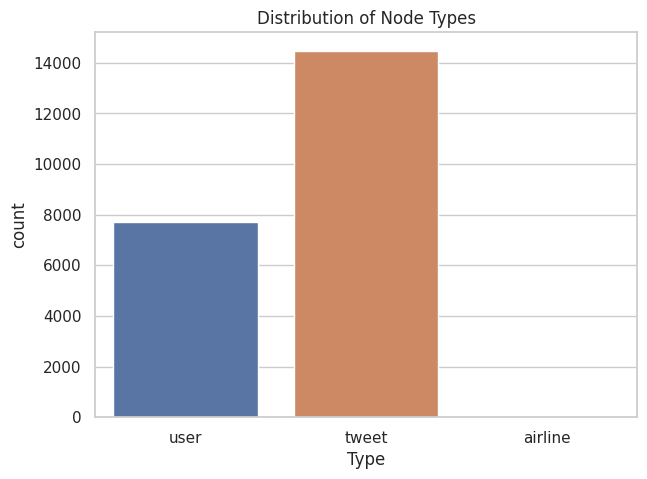

In [19]:
# 1. Type Distribution in Nodes Dataset
plt.figure(figsize=(7, 5))
nodes_type_plot = sns.countplot(x='Type', data=nodes_df)
nodes_type_plot.set_title('Distribution of Node Types')
plt.show()


In [20]:
from sklearn.model_selection import train_test_split

# 1. Categorical Encoding
edges_encoded = pd.get_dummies(edges_df, columns=['Type'])
nodes_encoded = pd.get_dummies(nodes_df, columns=['Type'])

# 2. Data Cleaning
# For this dataset, data cleaning might not be extensive since we didn't identify any obvious issues during EDA.
# However, we should ensure that all 'Source' and 'Target' in edges are present in 'Node' of nodes.

# Finding nodes in edges that are not in nodes
missing_nodes = set(edges_encoded['Source']).union(set(edges_encoded['Target'])) - set(nodes_encoded['Node'])

# If there are any missing nodes, we would add them to the nodes dataframe with a 'missing' type.
if missing_nodes:
    missing_nodes_df = pd.DataFrame(list(missing_nodes), columns=['Node'])
    missing_nodes_df['Type_missing'] = 1
    nodes_encoded = pd.concat([nodes_encoded, missing_nodes_df], ignore_index=True).fillna(0)

# Checking for duplicates and removing them if any
edges_encoded = edges_encoded.drop_duplicates()
nodes_encoded = nodes_encoded.drop_duplicates()

# 3. Feature Engineering
# Since this is graph data, additional features like node degree, centrality measures, etc., can be added.
# For this example, we'll keep it simple and proceed with the available features.

# 4. Data Splitting
# Splitting the data into training and testing sets
# Since this is unsupervised learning (clustering), we don't need to split the data based on labels.
X_train_edges, X_test_edges = train_test_split(edges_encoded, test_size=0.2, random_state=42)
X_train_nodes, X_test_nodes = train_test_split(nodes_encoded, test_size=0.2, random_state=42)

# Showing the first few rows of the processed data
X_train_edges.head(), X_train_nodes.head()


(                   Source              Target  Type_mentions  Type_posted
 7125        lizgottbrecht  570284840752427008              0            1
 21687  569890084893413376               Delta              1            0
 3732           peteeustic  568509134276050945              0            1
 6379             bvincent  568432260912959488              0            1
 11326       rodeorose1962  568598334643916800              0            1,
                      Node  Type_airline  Type_tweet  Type_user
 11123  568454607040606208             0           1          0
 5211              rkaradi             0           0          1
 18092  569337230935724032             0           1          0
 18791  568516267440631808             0           1          0
 4484         Ryancotter82             0           0          1)

<ipython-input-23-c7a600314d2b>:17: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(X_train_nodes_clustering)
<ipython-input-23-c7a600314d2b>:17: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(X_train_nodes_clustering)
<ipython-input-23-c7a600314d2b>:17: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(X_train_nodes_clustering)
<ipython-input-23-c7a600314d2b>:17: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(X_train_nodes_clustering)
<ipython-input-23-c7a600314d2b>:17: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(X_train_nodes_cluster

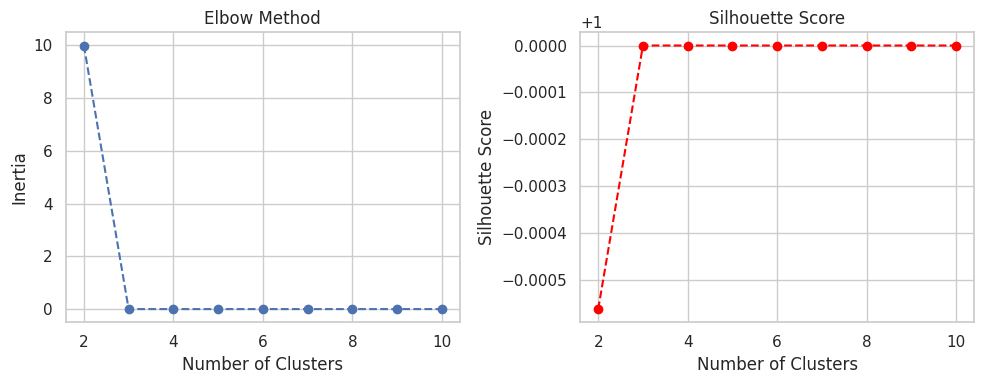

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Selecting only numerical features for clustering
X_train_nodes_clustering = X_train_nodes.select_dtypes(include=[np.number])

# Determining the Optimal Number of Clusters using the Elbow Method
inertia = []
silhouette_scores = []
range_clusters = range(2, 11)

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train_nodes_clustering)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train_nodes_clustering, kmeans.labels_))

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range_clusters, silhouette_scores, marker='o', linestyle='--', color='red')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [25]:
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore', category=UserWarning)


# Applying Isolation Forest on the nodes dataset
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # Assuming 1% of the data are anomalies
anomalies = iso_forest.fit_predict(X_train_nodes_clustering)

# Adding the anomaly results back to the dataset for analysis
X_train_nodes_anomalies = X_train_nodes_clustering.copy()
X_train_nodes_anomalies['Anomaly'] = anomalies

# Showing the anomalies detected by Isolation Forest
anomalies_detected = X_train_nodes_anomalies[X_train_nodes_anomalies['Anomaly'] == -1]
anomalies_detected.head(), anomalies_detected.shape[0]


(Empty DataFrame
 Columns: [Type_airline, Type_tweet, Type_user, Anomaly]
 Index: [],
 0)

In [26]:
# 1. Calculate Variance
feature_variances = X_train_nodes_clustering.var().sort_values(ascending=False)

# 2. Select High Variance Features (top 10 for visualization)
high_variance_features = feature_variances.head(10).index

# Showing the selected features with their variances
feature_variances.head(10)


Type_tweet      0.226339
Type_user       0.226253
Type_airline    0.000282
dtype: float64

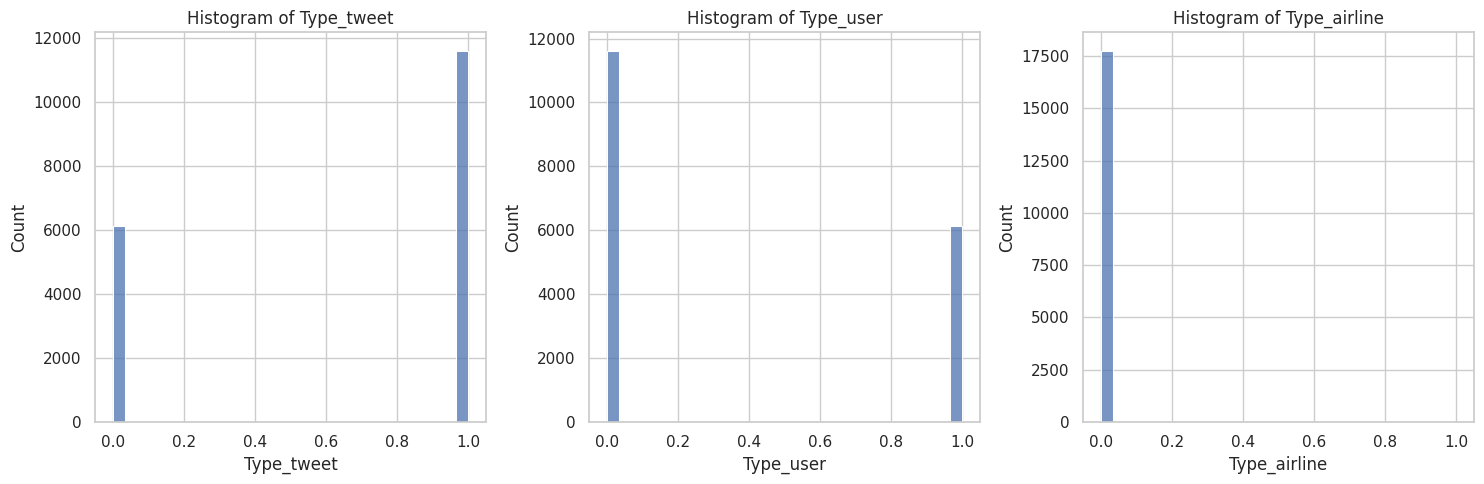

In [27]:
# Setting up the figure size for plots
plt.figure(figsize=(15, 5))

# Creating Histograms for the selected features
for i, feature in enumerate(high_variance_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(X_train_nodes_clustering[feature], bins=30, kde=False)
    plt.title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()


In [28]:
pip install h2o


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=50523c39dcedfe2d7a19f4a6e03c40372400f91360a06c82f637312658d8ade5
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o


In [29]:
import h2o
h2o.init()
h2o_data = h2o.H2OFrame(pd.DataFrame(edges_df))


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpqvdj329y
  JVM stdout: /tmp/tmpqvdj329y/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpqvdj329y/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_unknownUser_cp10o4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [35]:
train, valid, test = h2o_data.split_frame(ratios=[0.7, 0.15], seed=42)


In [36]:
from h2o.automl import H2OAutoML

y = "Target"
x = train.columns
x.remove(y)

aml = H2OAutoML(max_models=20, max_runtime_secs=600, seed=42)
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

AutoML progress: |
20:48:59.352: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
20:48:59.433: XGBoost_1_AutoML_2_20231024_204859 [XGBoost def_2] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_1_AutoML_2_20231024_204859_cv_1.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.


████
20:49:03.897: XGBoost_2_AutoML_2_20231024_204859 [XGBoost def_1] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_2_AutoML_2_20231024_204859_cv_1.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.


████
20:49:09.30: XGBoost_3_AutoML_2_20231024_204859 [XGBo

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_3_AutoML_2_20231024_204859


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    30                 30                          2236                   0            0            0             1             1             1

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 6.0378627295579384e+29
RMSE: 777036854309880.1
MAE: 675275611829022.6
RMSLE: 0.0013655607730647759
Mean Residual Deviance: 6.0378627295579384e+29

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 5.881095438787766e+29
RMSE: 766883005339651.9
MAE: 662863719497643.6
RMSLE: 0.0013477059149392373
Mean Residual Deviance: 5.881095438787766e+29

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 6.037897836916924e+29
RMSE: 777039113360255.8
MAE: 675277331636939.8
RMSLE: 0.0013655647430097606
Mean Residual Deviance: 6.037897836916924e+29

Cross-Validation Metrics Summary: 
                        mean          sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ------------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     6.75278e+14   2.30461e+12  6.73496e+14   6.76621e+14   6.78702e+14   6.73579e+14   6.7399e+14
mean_residual_deviance  6.0379e+29    2.66564e+27  6.01797e+29   6.04377e+29   6.07875e+29   6.01067e+29   6.03833e+29
mse                     6.0379e+29    2.66564e+27  6.01797e+29   6.04377e+29   6.07875e+29   6.01067e+29   6.03833e+29
r2                      -1.61512e-05  1.71097e-05  -1.94139e-05  -4.2635e-05   -1.52977e-06  -5.03061e-07  -1.66742e-05
residual_deviance       6.0379e+29    2.66564e+27  6.01797e+29   6.04377e+29   6.07875e+29   6.01067e+29   6.03833e+29
rmse                    7.77038e+14   1.71425e+12  7.75756e+14   7.77417e+14   7.79664e+14   7.75285e+14   7.77067e+14
rmsle                   0.00136556    3.01461e-06  0.0013633     0.00136623    0.00137018    0.00136249    0.00136561

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2023-10-24 20:49:07  0.904 sec   0                  7.77037e+14      6.75275e+14     6.03786e+29          7.66883e+14        6.62864e+14       5.8811e+29
    2023-10-24 20:49:07  0.949 sec   5                  7.77037e+14      6.75276e+14     6.03786e+29          7.66883e+14        6.62864e+14       5.8811e+29
    2023-10-24 20:49:07  0.972 sec   10                 7.77037e+14      6.75276e+14     6.03786e+29          7.66883e+14        6.62864e+14       5.8811e+29
    2023-10-24 20:49:07  0.992 sec   15                 7.77037e+14      6.75276e+14     6.03786e+29          7.66883e+14        6.62864e+14       5.8811e+29
    2023-10-24 20:49:07  1.012 sec   20                 7.77037e+14      6.75276e+14     6.03786e+29          7.66883e+14        6.62864e+14       5.8811e+29
    2023-10-24 20:49:07  1.032 sec   25                 7.77037e+14      6.75276e+14     6.03786e+29          7.66883e+14        6.62864e+14       5.8811e+29
    2023-10-24 20:49:07  1.056 sec   30                 7.77037e+14      6.75276e+14     6.03786e+29          7.66883e+14        6.62864e+14       5.8811e+29

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
Source      0                

In [37]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_3_AutoML_2_20231024_204859,7.77039e+14,6.0379e+29,6.75277e+14,0.00136556,6.0379e+29
GBM_4_AutoML_2_20231024_204859,7.77039e+14,6.0379e+29,6.75277e+14,0.00136556,6.0379e+29
GBM_1_AutoML_2_20231024_204859,7.77039e+14,6.0379e+29,6.75277e+14,0.00136556,6.0379e+29
GBM_grid_1_AutoML_2_20231024_204859_model_1,7.77039e+14,6.0379e+29,6.75277e+14,0.00136556,6.0379e+29
GBM_2_AutoML_2_20231024_204859,7.77039e+14,6.0379e+29,6.75277e+14,0.00136556,6.0379e+29
GBM_grid_1_AutoML_2_20231024_204859_model_5,7.77039e+14,6.0379e+29,6.75277e+14,0.00136556,6.0379e+29
GBM_grid_1_AutoML_2_20231024_204859_model_3,7.77039e+14,6.0379e+29,6.75277e+14,0.00136556,6.0379e+29
GBM_5_AutoML_2_20231024_204859,7.77039e+14,6.0379e+29,6.75277e+14,0.00136556,6.0379e+29
GBM_grid_1_AutoML_2_20231024_204859_model_4,7.77039e+14,6.0379e+29,6.75277e+14,0.00136556,6.0379e+29
GBM_grid_1_AutoML_2_20231024_204859_model_2,7.77039e+14,6.0379e+29,6.75277e+14,0.00136556,6.0379e+29


In [38]:
preds = aml.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo,predict
DRF_1_AutoML_2_20231024_204859,7.77822e+14,6.05006e+29,6.75275e+14,0.00136697,6.05006e+29,314,0.019362,DRF,5.6921e+17
XRT_1_AutoML_2_20231024_204859,7.77822e+14,6.05006e+29,6.75275e+14,0.00136697,6.05006e+29,364,0.005125,DRF,5.6921e+17
GBM_3_AutoML_2_20231024_204859,7.77822e+14,6.05006e+29,6.75275e+14,0.00136697,6.05006e+29,157,0.006787,GBM,5.6921e+17
GBM_4_AutoML_2_20231024_204859,7.77822e+14,6.05006e+29,6.75275e+14,0.00136697,6.05006e+29,208,0.005616,GBM,5.6921e+17
GBM_1_AutoML_2_20231024_204859,7.77822e+14,6.05006e+29,6.75275e+14,0.00136697,6.05006e+29,129,0.00464,GBM,5.6921e+17
GLM_1_AutoML_2_20231024_204859,7.77822e+14,6.05006e+29,6.75275e+14,0.00136697,6.05006e+29,89,0.000958,GLM,5.6921e+17
GBM_grid_1_AutoML_2_20231024_204859_model_1,7.77822e+14,6.05006e+29,6.75275e+14,0.00136697,6.05006e+29,216,0.004601,GBM,5.6921e+17
GBM_2_AutoML_2_20231024_204859,7.77822e+14,6.05006e+29,6.75275e+14,0.00136697,6.05006e+29,170,0.004589,GBM,5.6921e+17
GBM_grid_1_AutoML_2_20231024_204859_model_5,7.77822e+14,6.05006e+29,6.75275e+14,0.00136697,6.05006e+29,120,0.004777,GBM,5.6921e+17
GBM_grid_1_AutoML_2_20231024_204859_model_3,7.77822e+14,6.05006e+29,6.75275e+14,0.00136697,6.05006e+29,135,0.007441,GBM,5.6921e+17


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

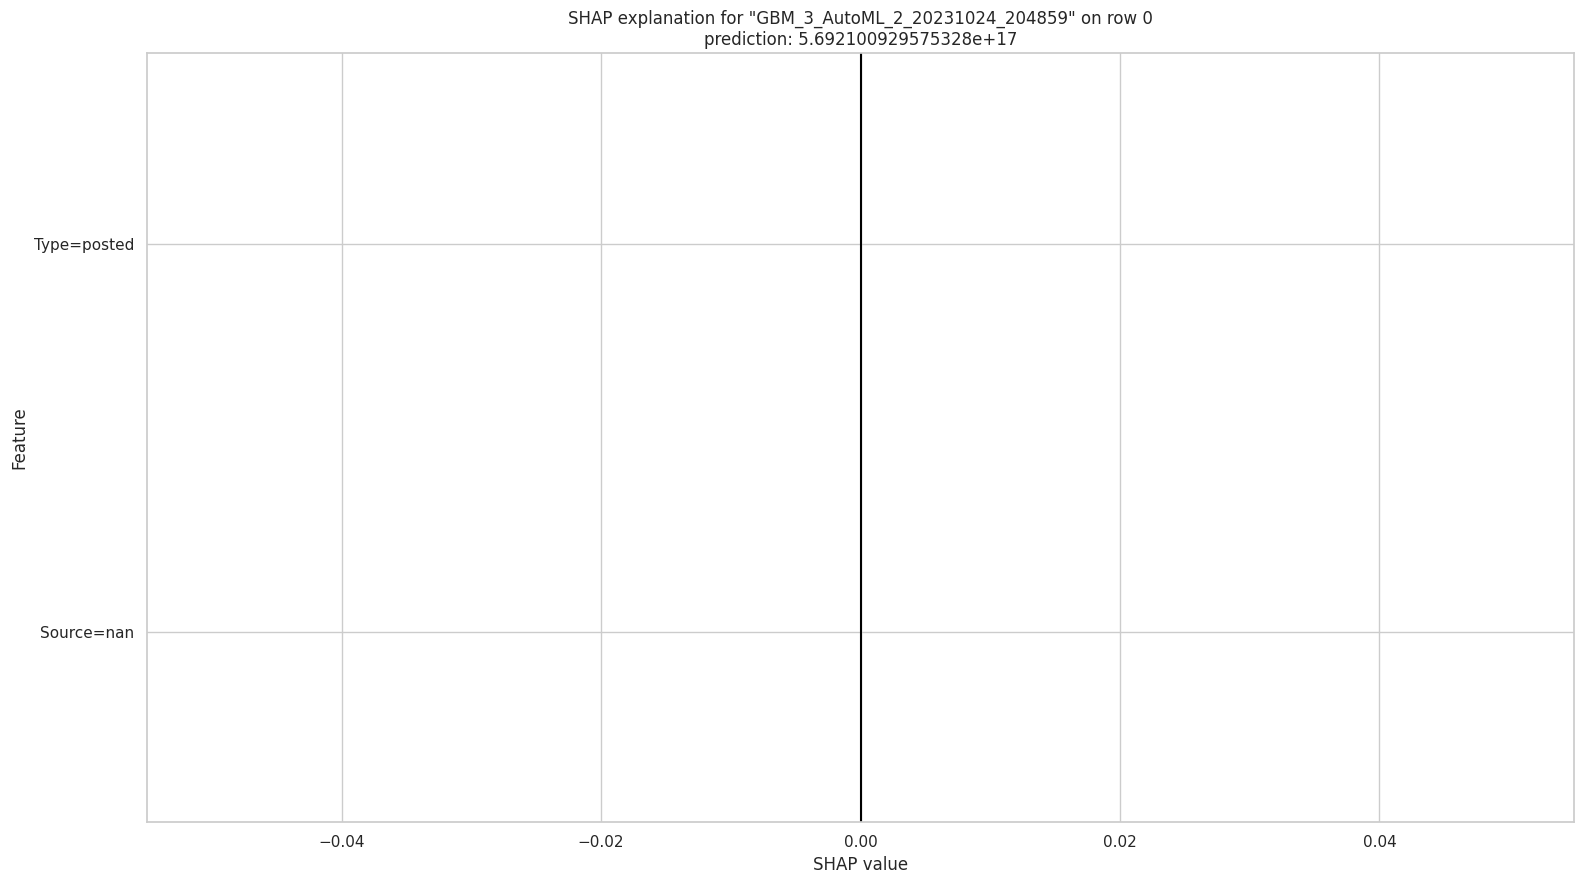

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo,predict
DRF_1_AutoML_2_20231024_204859,7.77822e+14,6.05006e+29,6.75275e+14,0.00136697,6.05006e+29,314,0.019362,DRF,5.6921e+17
XRT_1_AutoML_2_20231024_204859,7.77822e+14,6.05006e+29,6.75275e+14,0.00136697,6.05006e+29,364,0.005125,DRF,5.6921e+17
GBM_3_AutoML_2_20231024_204859,7.77822e+14,6.05006e+29,6.75275e+14,0.00136697,6.05006e+29,157,0.006787,GBM,5.6921e+17
GBM_4_AutoML_2_20231024_204859,7.77822e+14,6.05006e+29,6.75275e+14,0.00136697,6.05006e+29,208,0.005616,GBM,5.6921e+17
GBM_1_AutoML_2_20231024_204859,7.77822e+14,6.05006e+29,6.75275e+14,0.00136697,6.05006e+29,129,0.00464,GBM,5.6921e+17
GLM_1_AutoML_2_20231024_204859,7.77822e+14,6.05006e+29,6.75275e+14,0.00136697,6.05006e+29,89,0.000958,GLM,5.6921e+17
GBM_grid_1_AutoML_2_20231024_204859_model_1,7.77822e+14,6.05006e+29,6.75275e+14,0.00136697,6.05006e+29,216,0.004601,GBM,5.6921e+17
GBM_2_AutoML_2_20231024_204859,7.77822e+14,6.05006e+29,6.75275e+14,0.00136697,6.05006e+29,170,0.004589,GBM,5.6921e+17
GBM_grid_1_AutoML_2_20231024_204859_model_5,7.77822e+14,6.05006e+29,6.75275e+14,0.00136697,6.05006e+29,120,0.004777,GBM,5.6921e+17
GBM_grid_1_AutoML_2_20231024_204859_model_3,7.77822e+14,6.05006e+29,6.75275e+14,0.00136697,6.05006e+29,135,0.007441,GBM,5.6921e+17


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

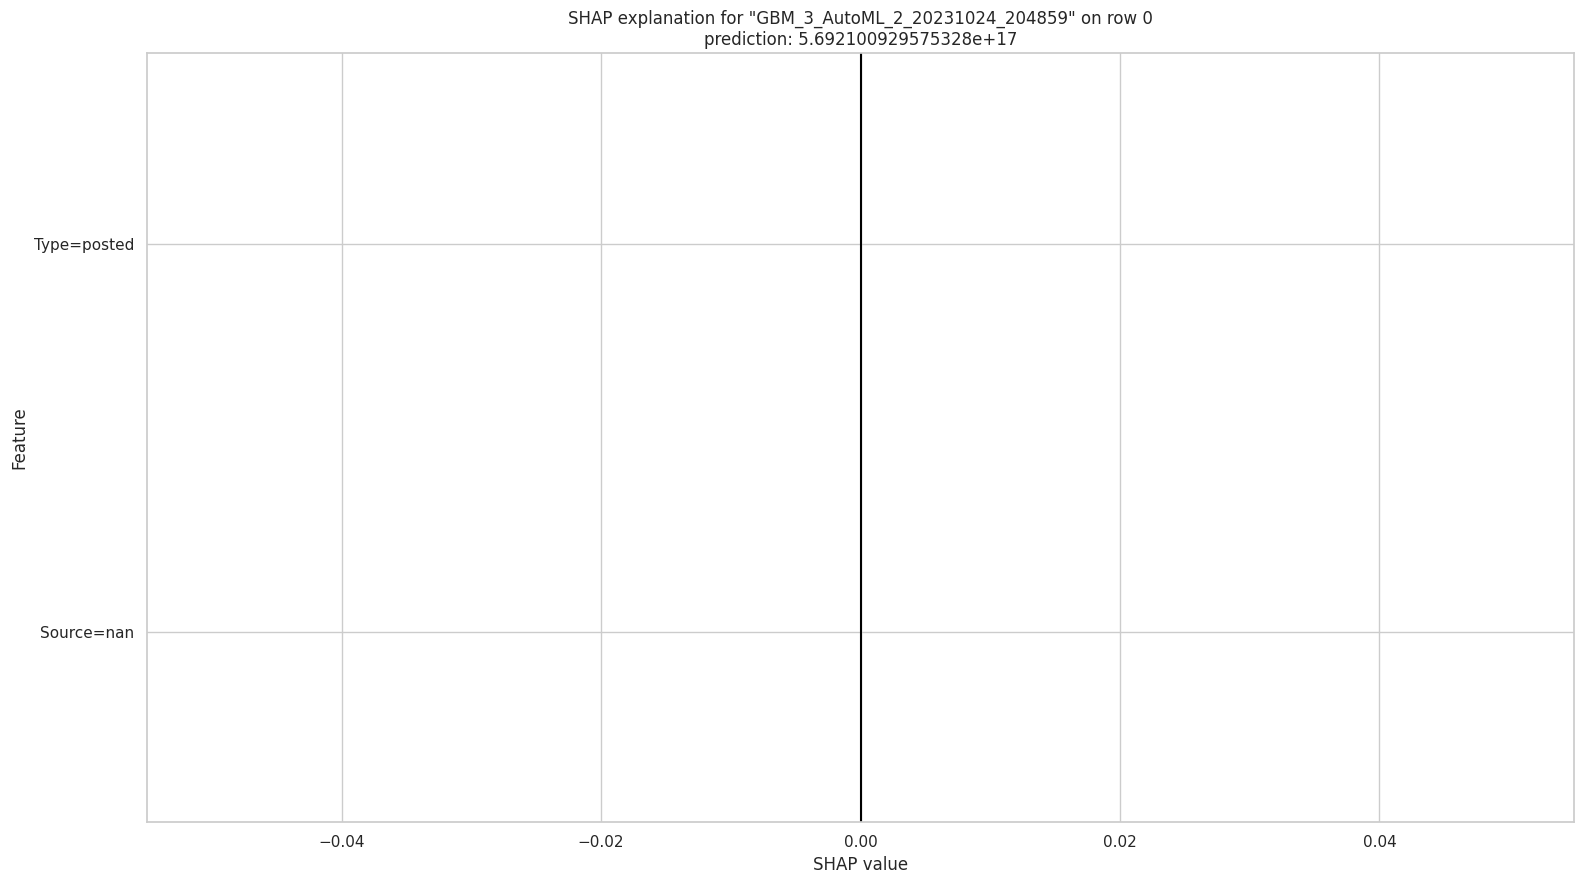

In [39]:
aml.explain_row(test, row_index=0)